# Data-Driven Insights on Health and Lifestyle: Analyzing Correlations and Testing Hypotheses

Name: Maria Jose


## Objective:
The goal of this project is to use a real-world health and lifestyle dataset to uncover relationships and test hypotheses regarding factors that may influence health outcomes, such as BMI, exercise habits, smoking, or diet. To apply hypothesis testing, correlation analyses, and other techniques to derive insights.

## Dataset: Healthy Lifestyle (Unlocking Wellness: Predictive Insights into Healthy Living)
**Source:** Kaggle

**Dataset URL:** Kaggle - Healthy Lifestyle (https://www.kaggle.com/datasets/aditibabu/healthy-lifestyle)

**Dataset overview:** <br>
The 'Healthy Lifestyle' dataset provides a detailed exploration of factors impacting individual health and well-being. With diverse variables such as age, BMI, smoking habits, dietary preferences, living conditions, etc, this dataset allows for comprehensive analysis of health-related behaviors and outcomes.

**Key features:**
* Demographic information (e.g., age, gender).
* Lifestyle habits (e.g., smoking, exercise, diet).
* Health metrics (e.g., BMI).

## I: Data Cleaning and Preprocesing

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.stats import norm, f_oneway, spearmanr, pointbiserialr, kendalltau
from sklearn.metrics import confusion_matrix
import math
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Dataset: Healthy Lifestyle data train
df_train = pd.read_csv('Train_Data.csv')
df_train.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [8]:
# Dataset: Healthy Lifestyle data test
df_test = pd.read_csv('Test_Data.csv')
df_test.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [9]:
# Merge dataset
df = pd.concat([df_train, df_test], ignore_index=True)

In [10]:
# Exploring data first rows
df.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0


In [11]:
# Summary information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32400 entries, 0 to 32399
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        32400 non-null  int64  
 1   Specific ailments          32400 non-null  int64  
 2   ID2                        32400 non-null  int64  
 3   Food preference            32387 non-null  object 
 4   Age                        32400 non-null  int64  
 5   BMI                        32400 non-null  float64
 6   Smoker?                    32400 non-null  object 
 7   Living in?                 32400 non-null  object 
 8   Any heriditary condition?  32400 non-null  object 
 9   Follow Diet                31165 non-null  float64
 10  Physical activity          31165 non-null  float64
 11  Regular sleeping hours     31165 non-null  float64
 12  Alcohol consumption        31165 non-null  float64
 13  Social interaction         31165 non-null  flo

In [12]:
# columns available
df.columns

Index(['ID1', 'Specific ailments', 'ID2', 'Food preference', 'Age', 'BMI',
       'Smoker?', 'Living in?', 'Any heriditary condition?', 'Follow Diet',
       'Physical activity', 'Regular sleeping hours', 'Alcohol consumption',
       'Social interaction', 'Taking supplements', 'Mental health management',
       'Illness count last year', 'Healthy'],
      dtype='object')

In [13]:
# rename columns
df = df.rename(columns={
    'ID1': 'ID', 
    'Specific ailments': 'Specific_ailments', 
    'Food preference': 'Food_preference', 
    'Smoker?': 'Smoking', 
    'Living in?': 'Area', 
    'Any heriditary condition?': 'Heriditary_condition', 
    'Follow Diet': 'Diet', 
    'Physical activity': 'Exercise', 
    'Regular sleeping hours': 'Regular_sleeping', 
    'Alcohol consumption': 'Alcohol', 
    'Social interaction': 'Socialization', 
    'Taking supplements': 'Supplements', 
    'Mental health management': 'Mental_health', 
    'Illness count last year': 'Illness_last_year'
})
df.columns

Index(['ID', 'Specific_ailments', 'ID2', 'Food_preference', 'Age', 'BMI',
       'Smoking', 'Area', 'Heriditary_condition', 'Diet', 'Exercise',
       'Regular_sleeping', 'Alcohol', 'Socialization', 'Supplements',
       'Mental_health', 'Illness_last_year', 'Healthy'],
      dtype='object')

In [14]:
# Number of unique values
df.nunique()

ID                      32400
Specific_ailments          53
ID2                     11579
Food_preference            32
Age                        78
BMI                     11579
Smoking                     3
Area                        2
Heriditary_condition        1
Diet                        2
Exercise                    2
Regular_sleeping            2
Alcohol                     2
Socialization               2
Supplements                 2
Mental_health               2
Illness_last_year           5
Healthy                     2
dtype: int64

* Checking for missing or non-relevant values in the dataset.

In [16]:
# Checking duplicated rows
print(df[df.duplicated()])

Empty DataFrame
Columns: [ID, Specific_ailments, ID2, Food_preference, Age, BMI, Smoking, Area, Heriditary_condition, Diet, Exercise, Regular_sleeping, Alcohol, Socialization, Supplements, Mental_health, Illness_last_year, Healthy]
Index: []


In [17]:
# Checking duplicated users
print(df[df['ID'].duplicated()])

Empty DataFrame
Columns: [ID, Specific_ailments, ID2, Food_preference, Age, BMI, Smoking, Area, Heriditary_condition, Diet, Exercise, Regular_sleeping, Alcohol, Socialization, Supplements, Mental_health, Illness_last_year, Healthy]
Index: []


According to the findings, there is not duplicated rows or users in the dataset.

* Deleting users 100+ years old.

In [20]:
# users 100+
len(df[df['Age'] >= 100])

13

In [21]:
# Deleting users 100+
df = df[df['Age'] < 100]
len(df['Age'])

32387

* Create an Age groups ordinal column based on the Age: <br>
Age (0 - 9): 0,
Age (10 - 19): 1,
Age (20 - 29): 2,
Age (30 - 39): 3,
Age (40 - 49): 4,
Age (50 - 59): 5,
Age (60 - 69): 6,
Age (70 - 79): 7,
Age (80 - 89): 8,
Age (90 - 99): 9

In [23]:
# Create column of ordinal data based on Age groups
def age_to_group(age):
    if age < 10:
        return 0
    elif 10 <= age <= 100:
        return (age // 10)
    return None

# Apply the function to create a new column
df['Age_group'] = df['Age'].apply(age_to_group)
df.head(10)

,ID,Specific_ailments,ID2,Food_preference,Age,BMI,Smoking,Area,Heriditary_condition,Diet,Exercise,Regular_sleeping,Alcohol,Socialization,Supplements,Mental_health,Illness_last_year,Healthy,Age_group
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,4
5,17927,13,8572,DX6,64,26.670369,NO,RURAL,Stable,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6
6,16421,21,12263,DX1,26,21.449830,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2
7,15598,7,6273,DX1,4,20.616673,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0
8,30250,18,1322,DX1,12,29.598280,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1
9,17111,20,2394,DX4 DX5,42,29.806330,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,4


In [24]:
# Checking missing values
print(df.isnull().sum())

ID                         0
Specific_ailments          0
ID2                        0
Food_preference            0
Age                        0
BMI                        0
Smoking                    0
Area                       0
Heriditary_condition       0
Diet                    1235
Exercise                1235
Regular_sleeping        1235
Alcohol                 1235
Socialization           1235
Supplements             1235
Mental_health           1235
Illness_last_year       1235
Healthy                 6477
Age_group                  0
dtype: int64


In [25]:
# Find the percentage of missing data
for i in df.columns:
    percentage_missing_column = df[i].isnull().sum()/df.shape[0]
    print(f"Percentage of missing values in {i}: {round(percentage_missing_column*100, 2)}")

Percentage of missing values in ID: 0.0
Percentage of missing values in Specific_ailments: 0.0
Percentage of missing values in ID2: 0.0
Percentage of missing values in Food_preference: 0.0
Percentage of missing values in Age: 0.0
Percentage of missing values in BMI: 0.0
Percentage of missing values in Smoking: 0.0
Percentage of missing values in Area: 0.0
Percentage of missing values in Heriditary_condition: 0.0
Percentage of missing values in Diet: 3.81
Percentage of missing values in Exercise: 3.81
Percentage of missing values in Regular_sleeping: 3.81
Percentage of missing values in Alcohol: 3.81
Percentage of missing values in Socialization: 3.81
Percentage of missing values in Supplements: 3.81
Percentage of missing values in Mental_health: 3.81
Percentage of missing values in Illness_last_year: 3.81
Percentage of missing values in Healthy: 20.0
Percentage of missing values in Age_group: 0.0


In [26]:
# Find empty values from Diet column
df[df['Diet'].isna()]

,ID,Specific_ailments,ID2,Food_preference,Age,BMI,Smoking,Area,Heriditary_condition,Diet,Exercise,Regular_sleeping,Alcohol,Socialization,Supplements,Mental_health,Illness_last_year,Healthy,Age_group
39,15386,36,7184,DX6,47,27.557885,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4
41,18798,13,2626,DX5,44,28.514937,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4
63,18577,51,12228,DX6,65,23.120156,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6
82,31496,32,3702,DX3,34,26.531821,YES,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3
90,15245,30,2110,DX2,32,19.701808,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32271,32331,35,2863,DX5,42,19.781170,NO,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
32273,26119,19,5375,DX6,29,18.351069,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
32291,7143,41,5898,DX1,33,25.748274,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
32304,5012,3,2481,DX2 DX4,29,18.202917,NO,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [27]:
# Count rows where all specified columns have NaN values
len(df[df[['Diet', 'Exercise', 'Regular_sleeping', 'Alcohol', 'Socialization', 'Supplements', 'Mental_health', 'Illness_last_year']].isna().all(axis=1)])

1235

All 1235 missing values are present across the important columns: 'Diet', 'Exercise', 'Regular_sleeping', 'Alcohol', 'Socialization', 'Supplements', 'Mental_health', and 'Illness_last_year'. Since these columns are crucial for the analysis, rows where all these columns contain missing values (NaN) will be removed.

In [29]:
# Removing rows where missing values occur across multiple columns
df = df.dropna(subset=['Diet'])  # take one as subset since it is missing in all

# Checking missing values
print(df.isnull().sum())

ID                         0
Specific_ailments          0
ID2                        0
Food_preference            0
Age                        0
BMI                        0
Smoking                    0
Area                       0
Heriditary_condition       0
Diet                       0
Exercise                   0
Regular_sleeping           0
Alcohol                    0
Socialization              0
Supplements                0
Mental_health              0
Illness_last_year          0
Healthy                 6215
Age_group                  0
dtype: int64


In [30]:
# Find empty values from Healthy column
df[df['Healthy'].isna()]

,ID,Specific_ailments,ID2,Food_preference,Age,BMI,Smoking,Area,Heriditary_condition,Diet,Exercise,Regular_sleeping,Alcohol,Socialization,Supplements,Mental_health,Illness_last_year,Healthy,Age_group
25920,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,3
25921,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,4
25922,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1
25923,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,NaN,1
25924,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32395,23747,21,3612,DX3,27,28.880884,NO,URBAN,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,NaN,2
32396,26138,27,4169,DX3,8,20.358229,NO,RURAL,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,NaN,0
32397,7536,39,8525,DX6,29,27.365294,NO,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,2
32398,29410,29,1866,DX5,65,22.546412,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,6


In [31]:
# Performing mode imputation on Healthy using 'Specific_ailments' and 'Age_group'
df['Healthy'] = df.groupby(['Specific_ailments', 'Age_group'])['Healthy'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

# Summary empty values
df.isnull().sum()

ID                      0
Specific_ailments       0
ID2                     0
Food_preference         0
Age                     0
BMI                     0
Smoking                 0
Area                    0
Heriditary_condition    0
Diet                    0
Exercise                0
Regular_sleeping        0
Alcohol                 0
Socialization           0
Supplements             0
Mental_health           0
Illness_last_year       0
Healthy                 0
Age_group               0
dtype: int64

The dataset now is clean and don't contain any missing values.

In [33]:
df.head()

,ID,Specific_ailments,ID2,Food_preference,Age,BMI,Smoking,Area,Heriditary_condition,Diet,Exercise,Regular_sleeping,Alcohol,Socialization,Supplements,Mental_health,Illness_last_year,Healthy,Age_group
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,4


* Replace values from the column Smoking as 1 and 0

In [35]:
# Replace values categorical into numerical (binary int)
replace_values = {'NO':0, 'YES':1}
df['Smoking'] = df['Smoking'].replace(replace_values)
print(df['Smoking'].unique())

[0 1]


* Unify binary columns (float to int)

In [37]:
# Replace values float into numerical (binary int)
columns_binary = ['Diet', 'Exercise', 'Regular_sleeping', 'Alcohol', 'Socialization', 'Supplements', 'Healthy', 'Mental_health', 'Illness_last_year']
df[columns_binary] = df[columns_binary].astype(int)
df.head()

,ID,Specific_ailments,ID2,Food_preference,Age,BMI,Smoking,Area,Heriditary_condition,Diet,Exercise,Regular_sleeping,Alcohol,Socialization,Supplements,Mental_health,Illness_last_year,Healthy,Age_group
0,2408,44,2668,DX6,49,20.500470,0,RURAL,Stable,1,0,0,0,0,0,0,1,1,4
1,25063,39,10363,DX3 DX4,20,26.076580,0,URBAN,Stable,0,0,0,0,1,0,0,1,1,2
2,26798,29,132,DX6,1,21.420866,0,URBAN,Stable,1,0,0,0,0,0,0,1,0,0
3,31907,27,10499,DX1,30,25.203247,0,RURAL,Stable,1,0,0,0,0,0,0,1,1,3
4,26412,9,7963,DX6,40,19.355846,1,RURAL,Stable,1,0,0,0,1,0,0,2,1,4


* Select the relevant information for analysis

In [39]:
# Columns with few context or information
print(f'Unique values in ID2 with len {len(df)} are:', df['ID2'].nunique())
print('Food_preference', df['Food_preference'].unique())
# Columns with only one value
print('Heriditary_condition', df['Heriditary_condition'].unique())
print('Mental_health', df['Mental_health'].unique())

Unique values in ID2 with len 31152 are: 10969
Food_preference ['DX6' 'DX3 DX4 ' 'DX1 ' 'DX4 DX5 ' 'DX5 ' 'DX2 ' 'DX2 DX4 '
 'DX2 DX4 DX5 ' 'DX2 DX5 ' 'DX3 ' 'DX1 DX5 ' 'DX4 ' 'DX1 DX3 ' 'DX1 DX2 '
 'DX1 DX3 DX4 ' 'DX1 DX3 DX5 ' 'DX1 DX2 DX5 ' 'DX2 DX3 DX5 ' 'DX1 DX4 '
 'DX2 DX3 DX4 ' 'DX1 DX2 DX3 ' 'DX2 DX3 ' 'DX3 DX4 DX5 ' 'DX1 DX4 DX5 '
 'DX1 DX2 DX4 ' 'DX3 DX5 ' 'DX1 DX3 DX4 DX5 ' 'DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX4 DX5 ' 'DX1 DX2 DX3 DX5 ' 'DX1 DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX4 ']
Heriditary_condition ['Stable']
Mental_health [0]


For analysis, it is not considered the columns 'ID2' and 'Food preference' because there is not specific context and information about them. Also the columns 'Heriditary_condition' and 'Mental_health' because the data is identical for all users.

In [41]:
# Storing the relevant columns
columns_relevant = ['ID', 'Age', 'Age_group', 'BMI', 'Area', 'Smoking', 'Diet', 'Exercise', 'Regular_sleeping', 'Alcohol', \
                    'Socialization', 'Supplements', 'Illness_last_year', 'Healthy', 'Specific_ailments']
df = df[columns_relevant]

### Cleaned data summary information:

In [43]:
# Cleaned data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31152 entries, 0 to 32399
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 31152 non-null  int64  
 1   Age                31152 non-null  int64  
 2   Age_group          31152 non-null  int64  
 3   BMI                31152 non-null  float64
 4   Area               31152 non-null  object 
 5   Smoking            31152 non-null  int64  
 6   Diet               31152 non-null  int32  
 7   Exercise           31152 non-null  int32  
 8   Regular_sleeping   31152 non-null  int32  
 9   Alcohol            31152 non-null  int32  
 10  Socialization      31152 non-null  int32  
 11  Supplements        31152 non-null  int32  
 12  Illness_last_year  31152 non-null  int32  
 13  Healthy            31152 non-null  int32  
 14  Specific_ailments  31152 non-null  int64  
dtypes: float64(1), int32(8), int64(5), object(1)
memory usage: 2.9+ MB


In [44]:
# Verifying unique values from cleaned data
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

ID: [ 2408 25063 26798 ...  7536 29410 29372]
Age: [49 20  1 30 40 64 26  4 12 42 65  3 63 32 10 48 47  9 11  7 24 23 25 62
 13  8 57 52 54 56 22 44 29 60 43 58  5 27 15 51 37 46 19 17 16  0  6 50
 33 41 28 21  2 18 59 34 53 39 66 55 61 36 45 14 31 35 38]
Age_group: [4 2 0 3 6 1 5]
BMI: [20.50046954 26.07657952 21.42086578 ... 19.427867   19.33126781
 21.5751094 ]
Area: ['RURAL' 'URBAN']
Smoking: [0 1]
Diet: [1 0]
Exercise: [0 1]
Regular_sleeping: [0 1]
Alcohol: [0 1]
Socialization: [0 1]
Supplements: [0 1]
Illness_last_year: [1 2 3 4 5]
Healthy: [1 0]
Specific_ailments: [44 39 29 27  9 13 21  7 18 20 16 49 51 15  4  5 33 10 41 38 14 12 43 28
  6 34  1 17  2 48 19 25 11 36 37 52 42  8 24 31 30 26 50 22 40 45 47 35
  3 32 46 23]


After cleaning the data, there are 31152 users, with ages < 99 years old. And no missing or wrong values.

## II. Exploratory Data Analysis (EDA)

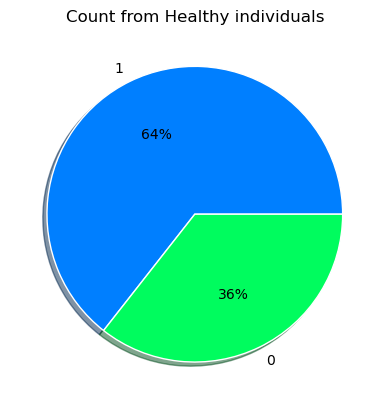

In [47]:
# Count from Healthy individuals
healthy_counts = df['Healthy'].value_counts()
colors = sb.color_palette('gist_ncar')
plt.pie(healthy_counts.values, labels=healthy_counts.index, autopct='%.0f%%', colors=colors, shadow=True, wedgeprops = {"edgecolor" : "w"})
plt.title("Count from Healthy individuals") 
plt.show()

In the dataset are more individuals that are perceived as Healthy than non-healthy.

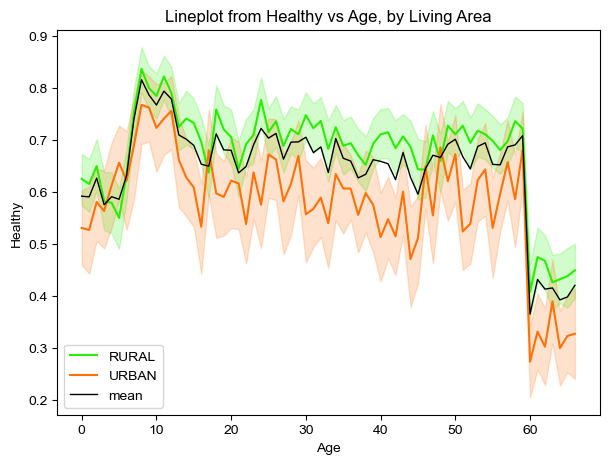

In [49]:
# Lineplot from Healthy vs Age
plt.figure(figsize=(7,5))
sb.lineplot(data=df, x='Age', y='Healthy', hue='Area', palette='gist_ncar')
sb.lineplot(data=df, x='Age', y='Healthy', estimator='mean', ci=None, color='black', label="mean", linewidth=1)
sb.set_style("whitegrid")
plt.title("Lineplot from Healthy vs Age, by Living Area") 
plt.show()

At all ages, people living in rural areas are healthier than those living in urban areas. Furthermore, between the ages of 10 and 60, there is a slight decline in perceived health, with fluctuations. Likewise, people over 60 tend to be less healthy than others.

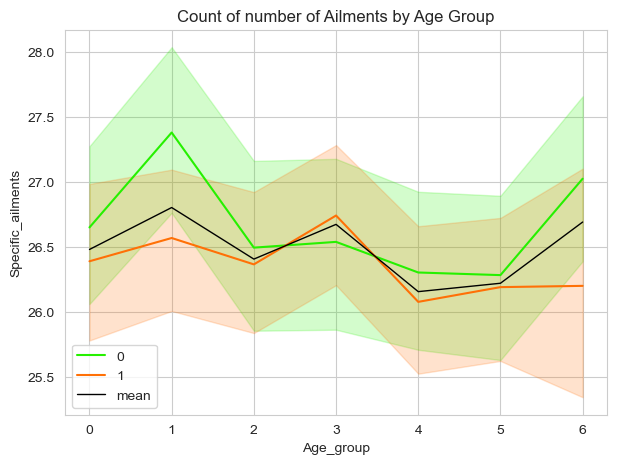

In [51]:
# Count from Ailments by Age group, and hue by Healthy
plt.figure(figsize=(7, 5))
sb.lineplot(data=df, x='Age_group', y='Specific_ailments', hue='Healthy', palette='gist_ncar')
sb.lineplot(data=df, x='Age_group', y='Specific_ailments', estimator='mean', ci=None, color='black', label="mean", linewidth=1)
plt.title("Count of number of Ailments by Age Group") 
sb.set_style("whitegrid")
plt.legend()
plt.show()

The number of ailments fluctuates more across age groups, with peaks around Group 1 (10-19). There are notable ups and downs, indicating that ailments may be influenced by temporary conditions rather than a clear age-related pattern.

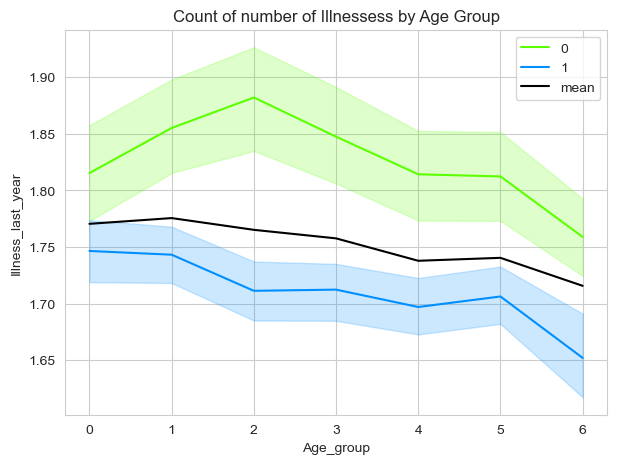

In [53]:
# Count from Illnessess last year by Age group, and hue by Healthy
plt.figure(figsize=(7,5))
sb.lineplot(data=df, x='Age_group', y='Illness_last_year', hue='Healthy', palette='gist_rainbow')
sb.lineplot(data=df, x='Age_group', y='Illness_last_year', estimator='mean', ci=None, color='black', label="mean")
plt.title("Count of number of Illnessess by Age Group") 
sb.set_style("whitegrid")
plt.show()

Illnesses are more frequent in younger groups and tend to decline with age. There are fewer fluctuations in later age groups.
As age increases, both groups show a decline in reported illnesses, but the gap remains, indicating that good health has long-term benefits.

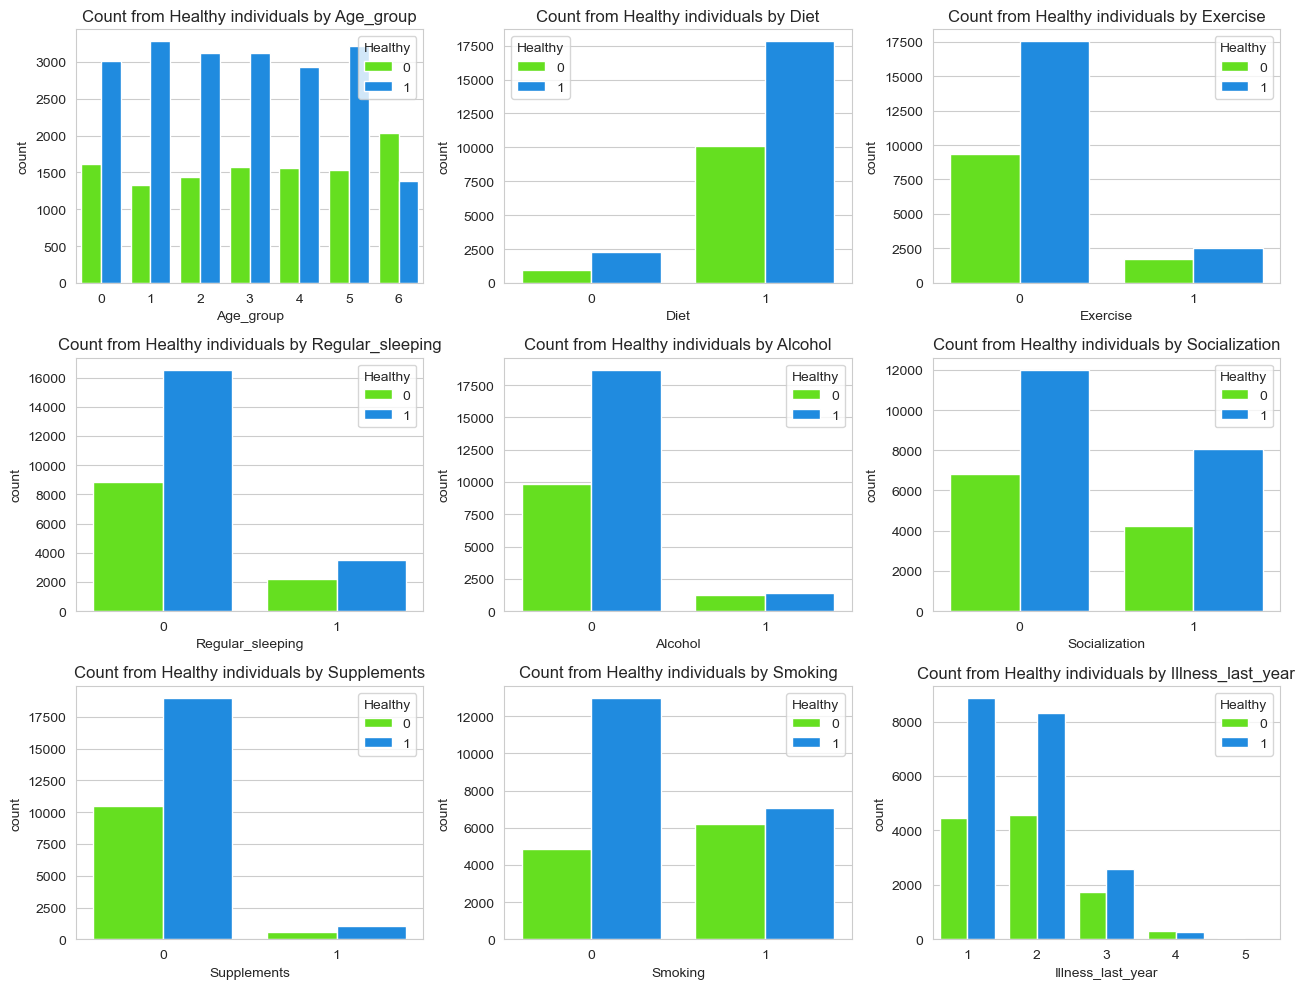

In [55]:
# Define the figure and axes
fig, axes = plt.subplots(3, 3, figsize=(13, 10))
axes = axes.flatten()

cols = ['Age_group', 'Diet', 'Exercise', 'Regular_sleeping', 'Alcohol', 'Socialization', 'Supplements', 'Smoking', 'Illness_last_year']
for i, col in enumerate(cols):
    sb.countplot(data=df, x=df[col], hue='Healthy', ax=axes[i], palette='gist_rainbow')
    sb.set_style("whitegrid")
    axes[i].set_title(f'Count from Healthy individuals by {col}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

* Most of the individuals are healthy across the age groups. Except in the Age group 6 (60-69), where more individuals are not healthy.
* Healthy individuals are more prevalent across all categories compared to Non-Healthy individuals.
* A balanced diet, regular exercise, and proper sleep are strongly associated with being healthy.
* Alcohol consumption is much lower among Healthy individuals.
* Smoking and Alcohol consumption is present in both groups, but there is still a less count in Healthy than in non-Healthy individuals.

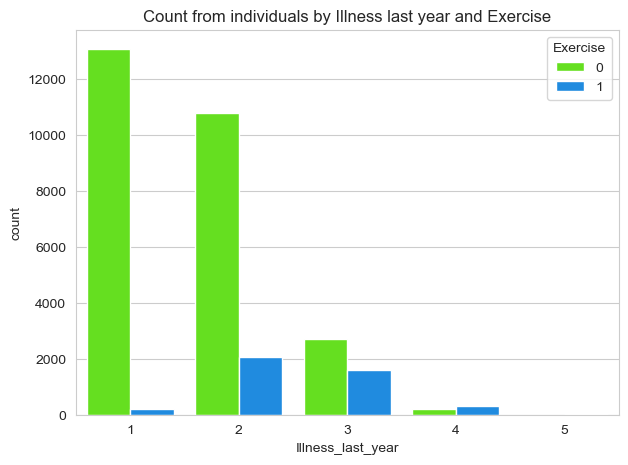

In [57]:
# Count from individuals by Illness_last_year and Exercise
plt.figure(figsize=(7,5))
sb.countplot(data=df, x='Illness_last_year', hue='Exercise', palette='gist_rainbow')
plt.title("Count from individuals by Illness last year and Exercise") 
sb.set_style("whitegrid")
plt.show()

Most individuals that don't exercise tended to have more illness the last year.

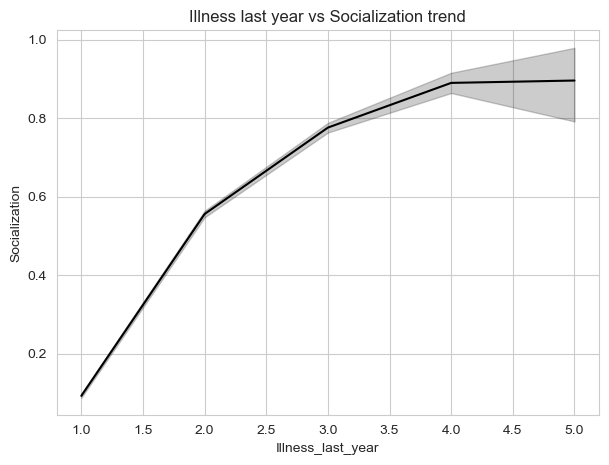

In [59]:
# Count from individuals by Illness_last_year and Socialization
plt.figure(figsize=(7,5))
sb.lineplot(data=df, x='Illness_last_year', y='Socialization', color='black')
plt.title("Illness last year vs Socialization trend") 
sb.set_style("whitegrid")
plt.show()

There is a clear trend in the increase of number of illnesses last year with socialization. Indicating that social factor can be associated with exposure to contagious and illnesses.

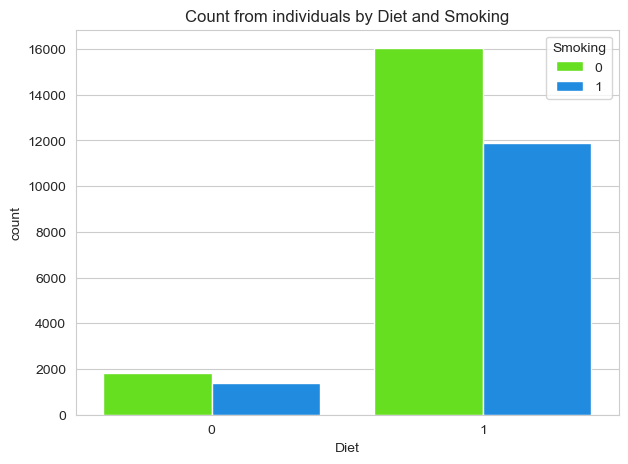

In [61]:
# Count from individuals by Diet and Smoking
plt.figure(figsize=(7,5))
sb.countplot(data=df, x='Diet', palette='gist_rainbow', hue='Smoking')
plt.title("Count from individuals by Diet and Smoking") 
sb.set_style("whitegrid")
plt.show()

Individuals who follow a diet are more predominant. Among them, there is a notable proportion of non smokers.

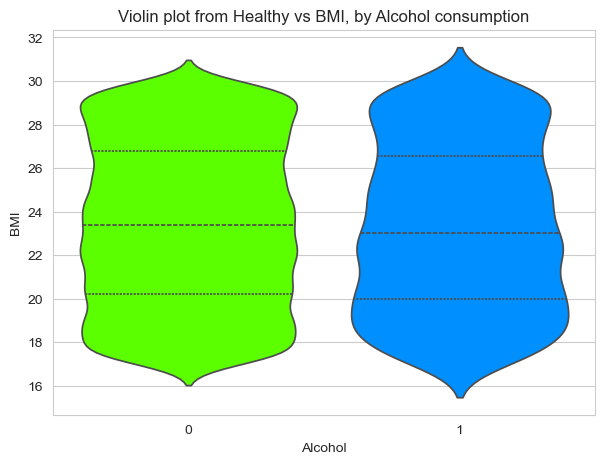

In [63]:
# Violin plot from Healthy vs BMI, by Alcohol consumption
plt.figure(figsize=(7,5))
sb.violinplot(data=df, x='Alcohol', y='BMI', palette='gist_rainbow', saturation=1, inner='quart')
plt.title("Violin plot from Healthy vs BMI, by Alcohol consumption") 
sb.set_style("whitegrid")
plt.show()

Individuals who consume Alcohol has a lower mean BMI than those who don't consume. The BMI is distributed across all the individuals, however, tends to be lower in more individuals who are alcoholic. Also, Alcohol consumers present higher max and lower min BMI than those who don't consume.

#### Distributions from dataset features

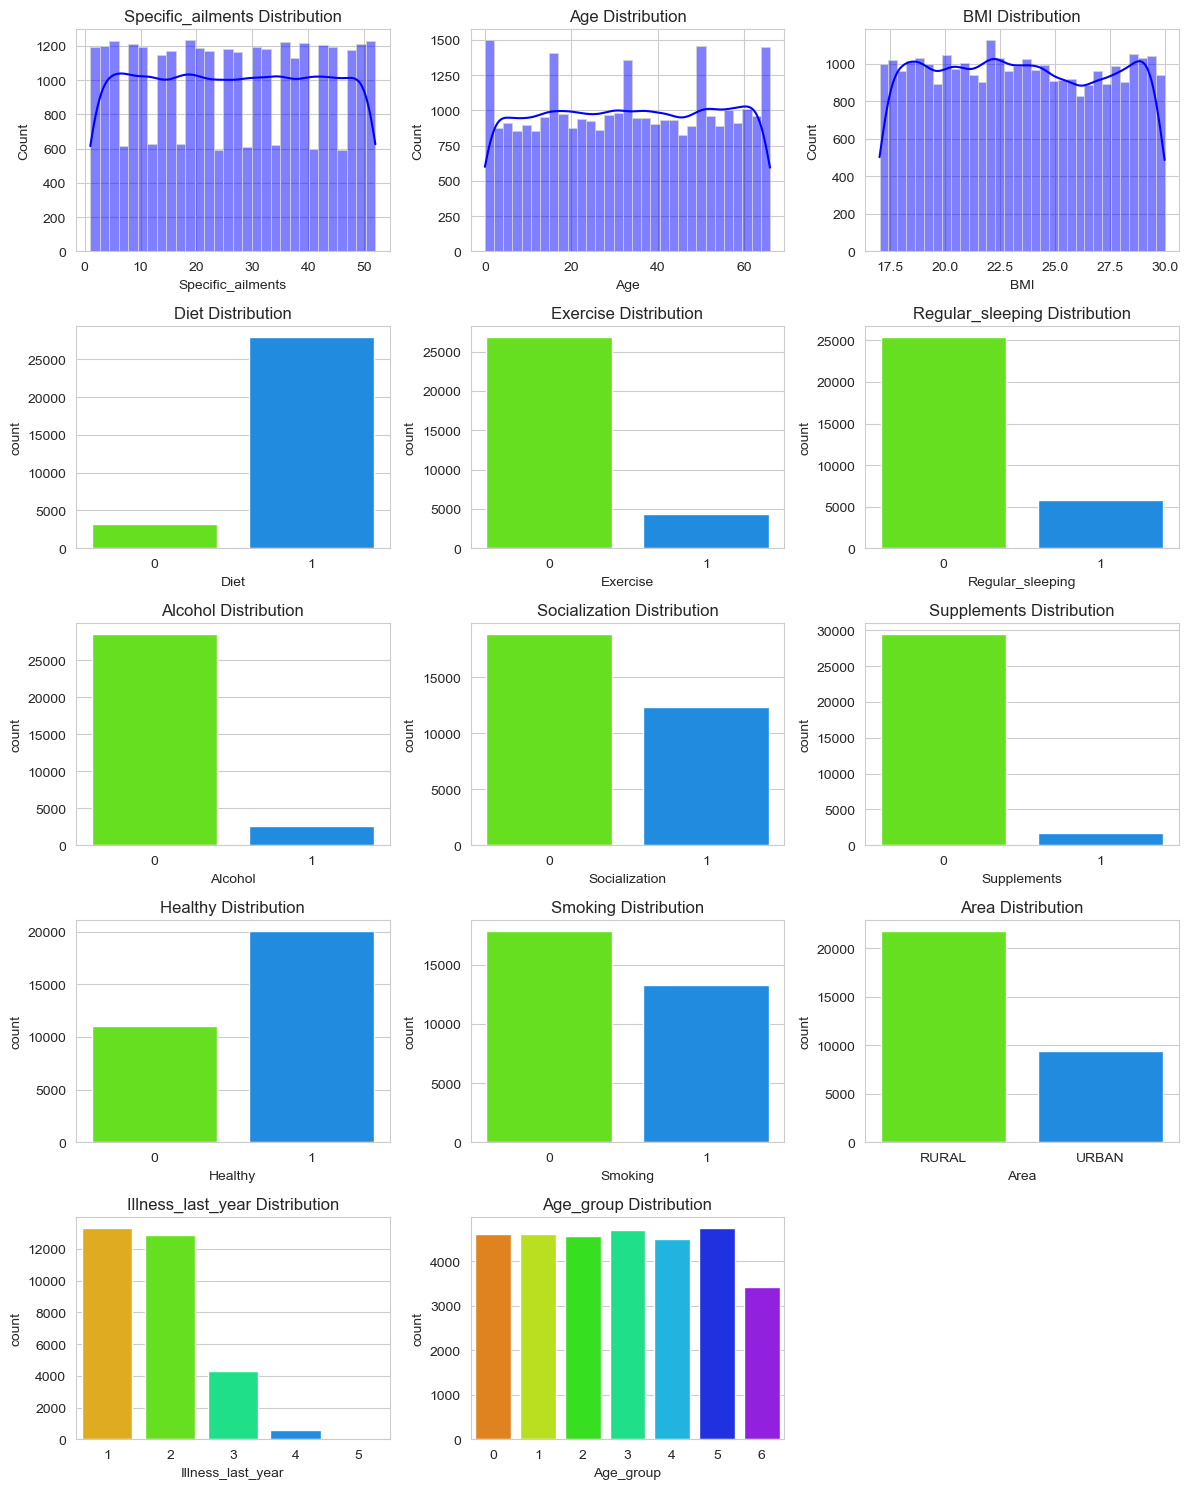

In [66]:
# Define the figure and axes
fig, axes = plt.subplots(5, 3, figsize=(12, 15))
axes = axes.flatten()

num_cols = ['Specific_ailments', 'Age', 'BMI']
bin_cols = ['Diet', 'Exercise', 'Regular_sleeping', 'Alcohol', 'Socialization', 'Supplements', 'Healthy', 'Smoking', 'Area', 'Illness_last_year', 'Age_group']

# Histogram of numerical columns
for i, col in enumerate(num_cols):
    sb.histplot(df[col], kde=True, bins='auto', color='blue', edgecolor='lightgray', ax=axes[i])
    sb.set_style("whitegrid")
    axes[i].set_title(f'{col} Distribution')

# Plot Binary/Ordinal columns
for i, col in enumerate(bin_cols):
    sb.countplot(x=df[col], palette='gist_rainbow', ax=axes[i + len(num_cols)])
    sb.set_style("whitegrid")
    axes[i + len(num_cols)].set_title(f'{col} Distribution')

fig.delaxes(axes[14])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## III: Descriptive Statistics

* Basic summary statistics for continuous variables in the dataset.

In [69]:
df.describe()

,ID,Age,Age_group,BMI,Smoking,Diet,Exercise,Regular_sleeping,Alcohol,Socialization,Supplements,Illness_last_year,Healthy,Specific_ailments
count,31152.000000,31152.000000,31152.000000,31152.000000,31152.000000,31152.000000,31152.000000,31152.000000,31152.000000,31152.000000,31152.000000,31152.000000,31152.000000,31152.000000
mean,16479.268522,33.237256,2.891147,23.446203,0.426939,0.896893,0.138193,0.184579,0.084746,0.395256,0.053480,1.753146,0.644164,26.483372
std,9532.862349,19.427894,1.949952,3.772842,0.494641,0.304104,0.345108,0.387962,0.278507,0.488913,0.224992,0.770589,0.478774,15.047338
min,1.000000,0.000000,0.000000,17.000336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,8205.750000,16.000000,1.000000,20.196831,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000
50%,16483.500000,33.000000,3.000000,23.375800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,26.000000
75%,24741.250000,50.000000,5.000000,26.763206,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,40.000000
max,32982.000000,66.000000,6.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,52.000000


* Correlation Matrix

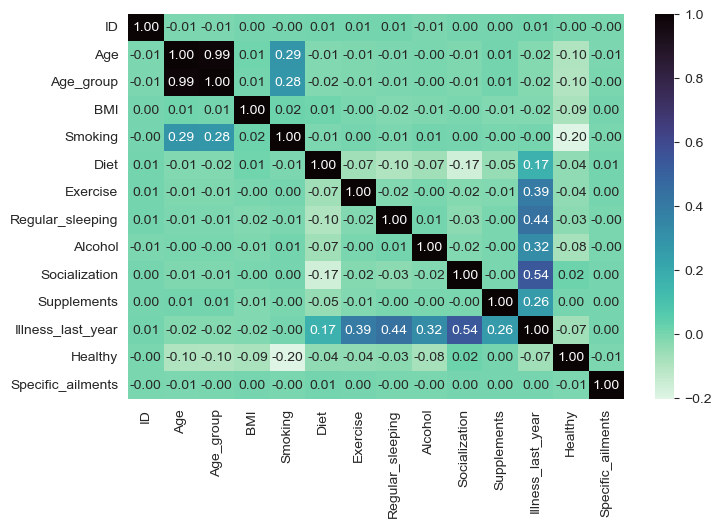

In [71]:
# Correlation matrix
data_numeric = df.drop(columns=['Area'])
correlation_matrix = data_numeric.corr()

# Plot the correlation
plt.figure(figsize=(8,5))
sb.heatmap(data_numeric.corr(), cmap='mako_r', annot=True, fmt=".2f")
plt.show()

## IV. Hypothesis Testing

### Step 1: Define Hypotheses

* The proposed hypotheses based on the dataset are:
    - Hypothesis 1: "Alcoholics have a higher average BMI than non-alcoholics."
    - Hypothesis 2: "People who exercise, follow a healthy diet, and have regular sleeping are healthier than those who do not."
    - Hypothesis 3: "The number of ailments and illness are related with the age group."
    - Hypothesis 4: "People who lives in rural area are healthier than those who do not."

### Step 2: Statistical calculations

#### Hypothesis 1 - Statistical calculations

<span style="color: blue"> **Hypothesis 1: "Alcoholics have a higher average BMI than non-alcoholics."** </span>

* The null and alternative hypotheses.
    - **Null Hypothesis (H₀):** u1 <= u2 (Alcohol consumers have less average BMI than non-consumers).
    - **Alternative Hypothesis (H₁):** u1 > u2 (Alcohol consumers have a higher average BMI than non-consumers).

For Hypothesis 1, I will use the **Z test**, with a sample size of 500 people from each group, and considering the population as the whole data for calculating the standard deviation.

In [79]:
# Population BMI
population_bmi = df['BMI']

# Alcohol consumption by BMI
alcoholics_bmi = df[df['Alcohol'] == 1]['BMI']
print("Alcoholics size:", len(alcoholics_bmi))

non_alcoholics_bmi = df[df['Alcohol'] == 0]['BMI']
print("Non alcoholics size:", len(non_alcoholics_bmi))

# Means
population_mean = df['BMI'].mean()
alcoholics_mean = alcoholics_bmi.mean()
non_alcoholics_mean = non_alcoholics_bmi.mean()

print("Population BMI Average:", population_mean)
print("Alcoholics BMI Average:", alcoholics_mean)
print("Non-alcoholics BMI Average:", non_alcoholics_mean)

Alcoholics size: 2640
Non alcoholics size: 28512
Population BMI Average: 23.446203142554857
Alcoholics BMI Average: 23.29900545151825
Non-alcoholics BMI Average: 23.459832558391586


In [80]:
# Population STD
population_std = population_bmi.std(ddof=0)

#Population mean
population_mean = df['BMI'].mean()
alcoholics_mean = alcoholics_bmi.mean()
non_alcoholics_mean = non_alcoholics_bmi.mean()

# Sample sizes
n_ztest = 500

# Sample Alcoholics and Non-Alcoholics BMI
sample_alcoholics = np.random.choice(alcoholics_bmi, size=n_ztest, replace=False)
sample_non_alcoholics = np.random.choice(non_alcoholics_bmi, size=n_ztest, replace=False)

# Perform z-test (approximating using normal distribution)
z_stat = (np.mean(sample_alcoholics) - np.mean(sample_non_alcoholics)) / (population_std / np.sqrt(n_ztest))
p_value = 1 - stats.norm.cdf(z_stat)

# Print results
print("Z-Test. Sample size:", n_ztest)
print("Population Standard Deviation:", population_std)
print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Setting significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Z-Test. Sample size: 500
Population Standard Deviation: 3.7727814996201166
Z-statistic: 0.5545065257827883
P-value: 0.289616120415233
Fail to reject the null hypothesis.


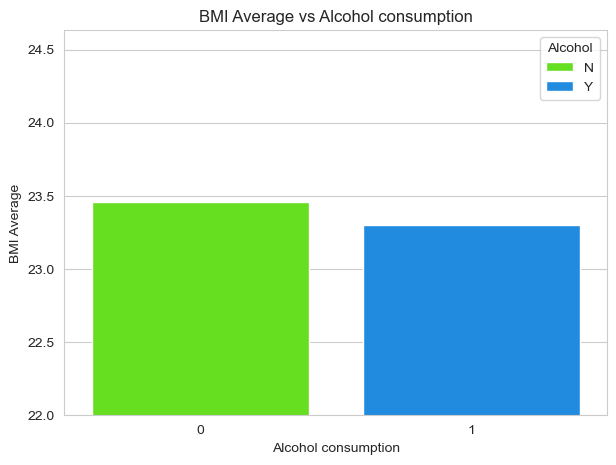

In [81]:
plt.figure(figsize=(7,5))
sb.barplot(x='Alcohol', y='BMI', data=df, hue='Alcohol', palette='gist_rainbow', ci=None)
plt.title("BMI Average vs Alcohol consumption")
plt.xlabel("Alcohol consumption")
plt.legend("NY",title="Alcohol")
plt.ylabel("BMI Average")
plt.ylim(22, None)
sb.set_style("whitegrid")
plt.show()

**Interpretation:** <br>
There is no significant evidence to reject the null hypothesis with a significance level of 5%. Alcohol consumers have less average BMI than non-consumers.

#### Hypothesis 2 - Statistical calculations

<span style="color: blue"> **Hypothesis 2: "People who exercise, follow a healthy diet, and have regular sleeping are healthier than those who do not."** </span>

* The null and alternative hypotheses.
    - **Null Hypothesis (H₀):** u1 = u2 (There is no significant difference in health status between people who exercise, follow a diet, sleep regular hours and those who do not).
    - **Alternative Hypothesis (H₁):** u1 != u2 (There is significant difference in health status between people who exercise, follow a diet, sleep regular hours and those who do not).

For Hypothesis 2, I will use the **ANOVA testing**, in order to compare multiple exclusive groups simultaneously.

In [86]:
# Group healthier - exercise, diet, sleeping
group_healthier = df[(df['Exercise'] == 1) & (df['Diet'] == 1) & \
                (df['Regular_sleeping'] == 1) ]['Healthy']
print(f"group_healthier: {len(group_healthier)}, {group_healthier.mean()}")

# Group non healthier - non exercise, non diet, nor sleeping
group_non_healthier = df[~((df['Exercise'] == 1) & (df['Diet'] == 1) & \
                           (df['Regular_sleeping'] == 1))]['Healthy']
print(f"group_non_healthier: {len(group_non_healthier)}, {group_non_healthier.mean()}")

group_healthier: 590, 0.28135593220338984
group_non_healthier: 30562, 0.6511681172698122


In [87]:
# ANOVA Test
anova_statistic, p_value = stats.f_oneway(group_healthier, group_non_healthier)

print("ANOVA statistic:", anova_statistic)
print("P-value:", p_value)

# Setting significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. ")
else:
    print("Fail to reject the null hypothesis. ")

ANOVA statistic: 349.2027298094837
P-value: 1.679021490091329e-77
Reject the null hypothesis. 


**Interpretation:** <br>
Reject the null hypothesis. There is sufficient evidence to refute the Null Hypothesis, with a significance level of 5%. There is significant difference in health status between people who exercise, follow a diet, sleep regular hours and those who do not.

#### Hypothesis 3 - Statistical calculations

<span style="color: blue"> **Hypothesis 3: "The mean number of ailments and illness, are related with the mean age of the age group."** </span>

* The null and alternative hypotheses.
    - **Null Hypothesis (H₀):** u1 = u2 = u3 (The mean number of ailments and illnesses is the same across all age groups).
    - **Alternative Hypothesis (H₁):** u differs (At least one age group has a different mean number of ailments and illnesses per year).

For Hypothesis 3, I will use the **ANOVA testing**, in order to compare multiple groups simultaneously.

In [92]:
# number of ailments and illness last year by Age group
mean_age = df.groupby('Age_group')['Age'].mean()
mean_ailments = df.groupby('Age_group')['Specific_ailments'].mean()
mean_illness = df.groupby('Age_group')['Illness_last_year'].mean()

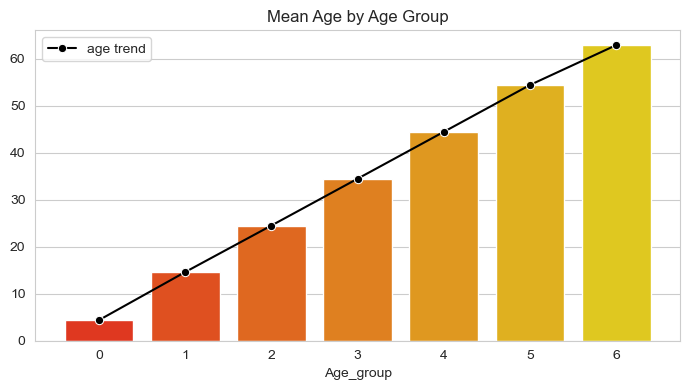

In [93]:
# Plot mean age by Age group
plt.figure(figsize=(7,4))
sb.barplot(x=mean_age.index, y=mean_age.values, palette='autumn')
sb.lineplot(x=mean_age.index, y=mean_age.values, marker='o', color='black', label='age trend')
plt.title("Mean Age by Age Group")
plt.tight_layout()
plt.show()

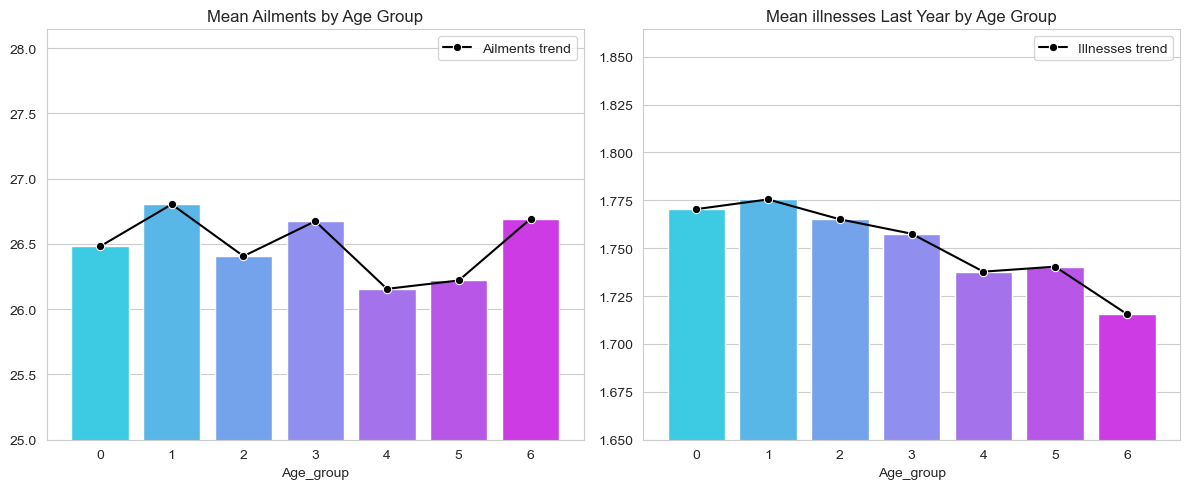

In [94]:
# Plot number of ailments and illness last year by Age group
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Mean Specific Ailments by Age Group
sb.barplot(x=mean_ailments.index, y=mean_ailments.values, ax=axes[0], palette='cool')
sb.lineplot(x=mean_ailments.index, y=mean_ailments.values, ax=axes[0], marker='o', color='black', label='Ailments trend')
axes[0].set_title("Mean Ailments by Age Group")
axes[0].set_ylim(25,)

# Mean Illness Last Year by Age Group
sb.barplot(x=mean_illness.index, y=mean_illness.values, ax=axes[1], palette='cool')
sb.lineplot(x=mean_illness.index, y=mean_illness.values, ax=axes[1], marker='o', color='black', label='Illnesses trend')
axes[1].set_title("Mean illnesses Last Year by Age Group")
axes[1].set_ylim(1.65,)

plt.tight_layout()
plt.show()

In [95]:
# ANOVA Test
anova_statistic, p_value = stats.f_oneway(mean_age.values, mean_ailments.values, mean_illness.values)

print("ANOVA statistic:", anova_statistic)
print("P-value:", p_value)

# Setting significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. ")
else:
    print("Fail to reject the null hypothesis. ")

ANOVA statistic: 13.420571772527413
P-value: 0.00027062158318173107
Reject the null hypothesis. 


**Interpretation:** <br>
Reject the null hypothesis. There is sufficient evidence to refute the Null Hypothesis, with a significance level of 5%. At least one of the groups has a significantly different mean number of ailments or illnesses compared to the others.

#### Hypothesis 4 - Statistical calculations

<span style="color: blue"> **Hypothesis 4: "People who lives in rural area are healthier than those who do not."** </span>

* The null and alternative hypotheses.
    - **Null Hypothesis (H₀):** u1 <= u2 (People who lives in urban area are healthier than those who live in rural).
    - **Alternative Hypothesis (H₁):** u1 > u2 (People who lives in rural area are healthier than those who live in urban).

For Hypothesis 4, I will use the **Z test**, with a sample size of 500 people from each group, and considering the population as the whole data for calculating the standard deviation.

In [100]:
# group people by living
living_rural = df[df['Area'] == 'RURAL']['Healthy']
print("People living rural size:", len(living_rural))
living_urban = df[df['Area'] == 'URBAN']['Healthy']
print("People living urban size:", len(living_urban))

# Means
living_rural_mean = living_rural.mean()
living_urban_mean = living_urban.mean()
population_health_mean = df['Healthy'].mean()

print("Population Health Average:", population_health_mean)
print("Rural Health Average:", living_rural_mean)
print("Urban Health Average:", living_urban_mean)

People living rural size: 21781
People living urban size: 9371
Population Health Average: 0.6441640986132512
Rural Health Average: 0.6735227950966438
Urban Health Average: 0.575925728310746


In [101]:
# Population STD
population_std_health = df['Healthy'].std(ddof=0)

# Sample sizes
n_ztest = 500

# Sample Alcoholics and Non-Alcoholics BMI
sample_living_rural = np.random.choice(living_rural, size=n_ztest, replace=False)
sample_living_urban = np.random.choice(living_urban, size=n_ztest, replace=False)

# Perform z-test (approximating using normal distribution)
z_stat = (np.mean(sample_living_rural) - np.mean(sample_living_urban)) / (population_std_health / np.sqrt(n_ztest))
p_value = 1 - stats.norm.cdf(z_stat)

# Print results
print("Z-Test. Sample size:", n_ztest)
print("Population Standard Deviation:", population_std_health)
print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Setting significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Z-Test. Sample size: 500
Population Standard Deviation: 0.4787658223713465
Z-statistic: 5.60458046004484
P-value: 1.0437999908852191e-08
Reject the null hypothesis.


**Interpretation:** <br>
There is significant evidence to reject the null hypothesis with a significance level of 5%. People who lives in rural area are healthier than those who live in urban.

## V. Correlation Testing:

Identify correlations between pairs of variables, and visualize the correlations with heatmaps and scatterplots

### Correlation test: Pearson Correlation

<span style="color: blue"> **Is there a Pearson Correlation between Age and BMI?** </span>
- Correlation test: Pearson Correlation
- Why? Both Age and BMI are continuous numerical variables. Pearson correlation measures the linear relationship between two continuous variables.

In [107]:
# Split the data into lists
bmi = df['BMI'].to_list()
age = df['Age'].to_list()

In [108]:
# Pearson correlation for BMI and Age
corr_bmi_age, p_bmi_age = stats.pearsonr(bmi, age)
 
# Print results
print(f"Correlation between BMI and Age: {corr_bmi_age}, P-Value: {p_bmi_age}")

Correlation between BMI and Age: 0.010089638021822956, P-Value: 0.07494711830068838


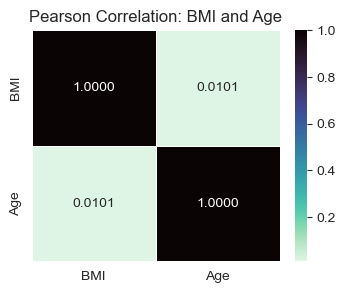

In [109]:
# Correlation matrix
correlation_matrix_two = df[["BMI", "Age"]].corr(method="pearson")

# Plot heatmap for only two variables
plt.figure(figsize=(4, 3))
sb.heatmap(correlation_matrix_two, annot=True, cmap='mako_r', fmt=".4f", linewidths=0.5)

# Add title
plt.title("Pearson Correlation: BMI and Age")

# Show plot
plt.show()

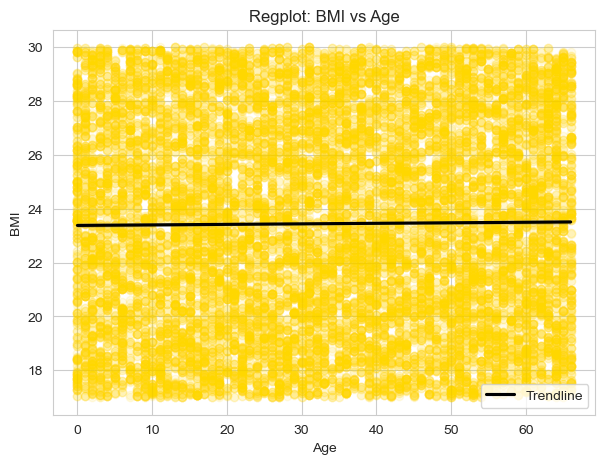

In [110]:
# Regplot with trendline
plt.figure(figsize=(7, 5))
sb.regplot(data=df, x='Age', y='BMI', scatter_kws={'alpha': 0.1, 'color': 'gold'}, line_kws={'color': 'black', 'label': 'Trendline'})
plt.legend()
plt.title('Regplot: BMI vs Age')
plt.show()

**Interpretation:** <p>
The correlation is positive but very weak (0.0101), and the relationship is not statistically significant (p > 0.05).
So, there is no significant correlation between BMI and Age in this dataset. This suggests that BMI does not systematically increase or decrease with Age in this dataset.

### Correlation test: Spearman Correlation

<span style="color: blue"> **Is there a Spearman Correlation between social interaction and number of illness presented in the last year?** </span>
- Correlation test: Spearman Correlation
- Why? Since the relationship is non-linear: Social interaction (binary: yes/no) and Illness count last year (rank 1-5).

In [114]:
# Split the data into lists
illness_last_year = df['Illness_last_year'].to_list()
social_interaction = df['Socialization'].to_list()

In [115]:
# Calculate Spearman's Rank Correlation
rho_illness_social, p_value_illness_social = spearmanr(illness_last_year, social_interaction)
print(f"Spearman Correlation Coefficient: {rho_illness_social:.3f}")
print(f"P-Value: {p_value_illness_social:.4f}")

Spearman Correlation Coefficient: 0.558
P-Value: 0.0000


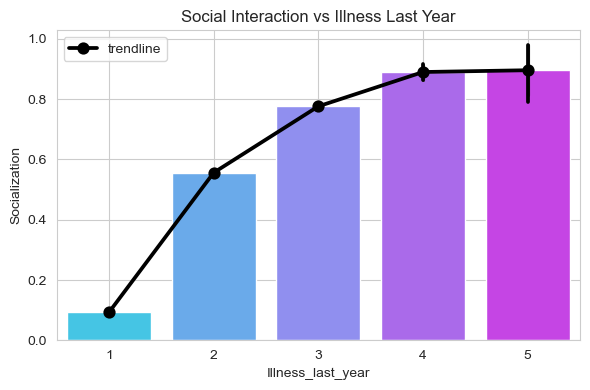

In [116]:
# Bar Plot with trend
plt.figure(figsize=(6, 4))
sb.barplot(data=df, x='Illness_last_year', y='Socialization', estimator=np.mean, palette='cool')
sb.pointplot(data=df, x='Illness_last_year', y='Socialization', color='black', label='trendline')
plt.title('Social Interaction vs Illness Last Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [117]:
# Porcentages
data = df.groupby(['Illness_last_year','Socialization']).size().unstack()
data['total'] = data[0]+data[1]
data_porcentage = pd.DataFrame({0: data[0]*100 / data['total'], 1: data[1]*100 / data['total']})
data_porcentage

,0,1
Illness_last_year,,
1,90.711819,9.288181
2,44.407359,55.592641
3,22.397038,77.602962
4,11.015491,88.984509
5,10.416667,89.583333


**Interpretation:** <p>
The correlation is positive and moderate (0.555), indicating that as social interaction increases, the number of illnesses tends to increase. The relationship is statistically significant (p < 0.05), meaning there is strong evidence that social interaction is associated with the number of illnesses in this dataset.

This suggests that individuals with higher social interaction may be more likely to experience illness, possibly due to increased exposure to contagious factors.

### Correlation test: Point-Biserial Correlation

<span style="color: blue"> **Is there any Point-Biserial Correlation between Smoking and BMI.** </span>
- Correlation test: Point-Biserial Correlation
- Why? Smoking is a binary variable (yes or no), and BMI is a continuous variable. The point-biserial correlation is used to measure the strength of association between a continuous and a binary variable.

In [121]:
# Split the data into lists
smoking = df['Smoking'].to_list()
BMI = df['BMI'].to_list()

In [122]:
# Calculate Point-Biserial Correlation
rho_smoking_BMI, p_value_smoking_BMI = pointbiserialr(smoking, BMI)

print(f"Point-Biserial Correlation Coefficient: {rho_smoking_BMI:.3f}")
print(f"P-Value: {p_value_smoking_BMI:.4f}")

Point-Biserial Correlation Coefficient: 0.016
P-Value: 0.0040


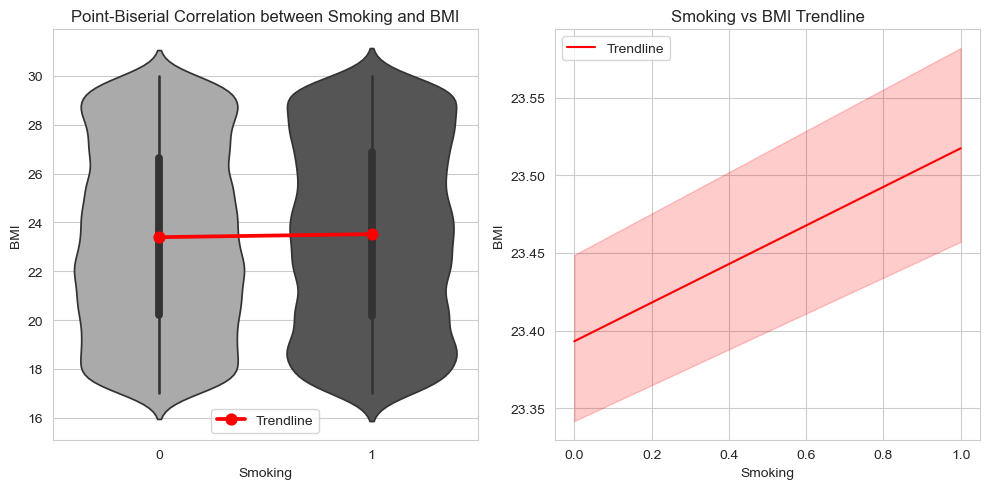

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Correlation between Smoking and BMI
sb.violinplot(data=df, x='Smoking', y='BMI', ax=axes[0], palette='gist_yarg')
sb.pointplot(data=df, x='Smoking', y='BMI', ax=axes[0], color='red', marker='o', label='Trendline')
axes[0].set_title("Point-Biserial Correlation between Smoking and BMI")

# Line plot for trendline
sb.lineplot(data=df, x='Smoking', y='BMI', color='red', ax=axes[1], label='Trendline', ci=95)
axes[1].set_title('Smoking vs BMI Trendline')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:** <p>
The correlation is positive but very weak (0.016), and the relationship is statistically significant (p < 0.05).
This suggests that smokers might have slightly higher BMI on average than non-smokers, but the effect is extremely small.

### Correlation test: Phi Coefficient

<span style="color: blue"> **Is there a Phi Coefficient correlation between Living Area (Urban/Rural) and Health status?** </span>
- Correlation test: Phi Coefficient
- Why? "Living in?" (Rural/Urban) and "Healthy" (Yes/No) are binary variables. The Phi coefficient is used to measure the association between two binary variables.

In [127]:
# Split the data into lists
Living = df['Area'].to_list()
Living = [1 if x == 'RURAL' else 0 if x == 'URBAN' else x for x in Living]

Healthy = df['Healthy'].to_list()

In [128]:
# Create the confusion matrix
conf_matrix = confusion_matrix(Living, Healthy)
a, b, c, d = conf_matrix[1, 1], conf_matrix[1, 0], conf_matrix[0, 1], conf_matrix[0, 0]

# Apply the Phi Coefficient formula
phi = (a * d - b * c) / sqrt((a + b) * (a + c) * (b + d) * (c + d))

print(f"Phi Coefficient: {phi:.3f}")

Phi Coefficient: 0.093


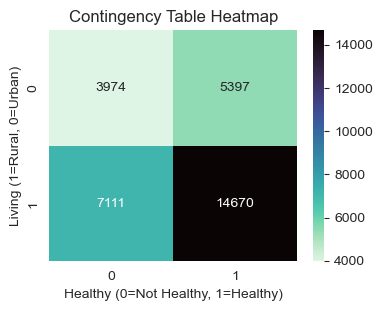

In [129]:
# Create a contingency table
contingency_table = pd.crosstab(Living, Healthy)

# Heatmap of Contingency Table
plt.figure(figsize=(4, 3))
sb.heatmap(contingency_table, annot=True, cmap='mako_r', fmt='d')
plt.xlabel("Healthy (0=Not Healthy, 1=Healthy)")
plt.ylabel("Living (1=Rural, 0=Urban)")
plt.title("Contingency Table Heatmap")
plt.show()

**Interpretation:** <p>
Phi = 0.093 indicates a very weak positive correlation between living in a rural area (1) and being healthy (1).
Since the coefficient is positive, this means that people living in rural areas are slightly more likely to be healthy compared to those living in urban areas. This finding could be influenced by class imbalance in the dataset. 

### Correlation test: Kendall’s Tau

<span style="color: blue"> **Is there a Kendall’s Tau Correlation between age group and number of ailments?** </span>
- Correlation test: Kendall’s Tau
- Why? age group is ordinal variable. Kendall’s Tau is effective for measuring monotonic relationships between ordinal or ranked data.

In [133]:
# Extract the data
age_group_num = df['Age_group'].to_list()
num_ailments = df['Specific_ailments'].to_list()

# Compute Kendall’s Tau correlation
tau, p_value = kendalltau(age_group_num, num_ailments)

# Print results
print(f"Kendall’s Tau Correlation: {tau:.4f}")
print(f"P-Value: {p_value:.4f}")

Kendall’s Tau Correlation: -0.0036
P-Value: 0.3804


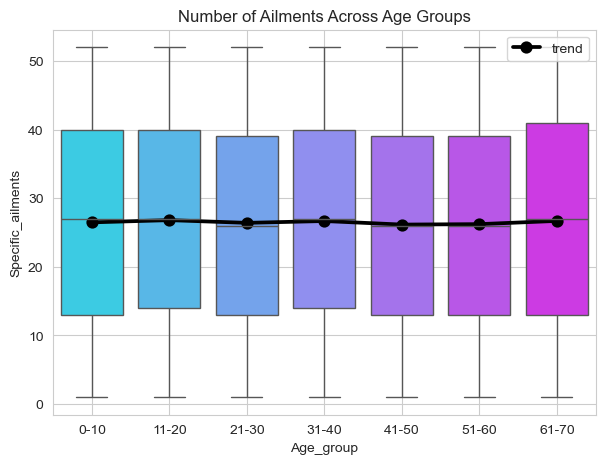

In [134]:
# Aggregate a numeric column to indicate the rank of the ordinal data
age_mapping = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6}

plt.figure(figsize=(7,5))
sb.boxplot(data=df, x="Age_group", y="Specific_ailments", palette="cool", meanline=False)
sb.pointplot(data=df, x="Age_group", y="Specific_ailments", color='black', marker='o', label='trend')
plt.title("Number of Ailments Across Age Groups")
plt.xticks(ticks=range(0, 7), labels=age_mapping.keys())
plt.legend()
plt.grid(True)
plt.show()

**Interpretation:** <p>
There is very low correlation between age group and number of ailments. Tau (-0.0036) is too small to suggest a relationship and P-value (0.3804) is too high to be statistically significant.
In addition, the plot confirms that the data is distributed across different ailment counts, with no clear trend.

## VI. Interpretation & Real-World Application:

### Factors Influencing BMI and Health Outcomes:
* The analysis found no significant correlation between BMI and age, suggesting BMI does not systematically change with age in this dataset.
* Alcohol consumption showed a very weak negative correlation with BMI, indicating alcohol consumers might have slightly lower BMI on average, but the effect is negligible.
* For smokers, the correlation with BMI suggests that smokers might have slightly higher BMI on average than non-smokers, but the effect is extremely small.
* Living in a rural area was associated with a higher likelihood of being healthy compared to urban living.
* There is no strong or significant relationship between age and the number of ailments in the dataset. Suggesting that other factors (such as lifestyle, genetics, or environmental influences) might be more important determinants of health than just age alone.

### Impact of Exercise and Social Behaviors on Health:
* Regular physical activity and a balanced diet were key indicators of good health, reinforcing the need for initiatives that support active living.
* The weak correlation between living conditions (urban vs. rural) and health suggests that while rural populations tend to report better health. But other socioeconomic or environmental factors may also play a role.
* While smokers might have slightly higher BMI, it's important to explore whether smoking has a stronger impact on other health metrics, such as sleep quality, illness frequency, or mental well-being.

### Health Policy and Lifestyle Recommendations:
* The analysis confirmed that individuals with healthy habits as regular exercise, follow a healthy diet, and maintain regular sleep patterns are significantly healthier than those who do not. This highlights the importance of promoting healthy lifestyle changes rather than isolated behaviors.
* The finding that social interaction correlates with higher illness counts suggests that increased exposure to contagious factors could be a risk. Public health campaigns could emphasize proper hygiene and preventive measures in social settings.

### Real-World Applications:
* Public Health Policies: Improve health campaigns and urban wellness initiatives.
* Healthcare & Prevention: Use insights for personalized health programs and check-ups.
* Workplace Wellness: Promote corporate programs for better diet, exercise, and sleep.
* Community Health Initiatives: Encourage hygiene awareness and healthy lifestyle access.
* Education & Awareness: Implement school programs and public campaigns on healthy habits.